In [26]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
def open_image(): # A method to open an image
    val = input("Enter your image path: ")  
    image = Image.open(val)
    imageArray = np.array(image)#return an array of the image
    return imageArray
def sharpeningConvolve(image, kernel): # a method to perform convolution 
    convolved_image =  np.zeros(image.shape[:2]) 
    print(convolved_image.dtype)
    zero_pad_size = int(len(kernel)/2)
    image_zero_padding=np.pad(image,((zero_pad_size,zero_pad_size),(zero_pad_size,zero_pad_size)),'constant')
    for i in range(image.shape[1]):     # Loop over every pixel of the image
        for j in range(image.shape[0]):
            convolved_image[j,i]=(kernel*image_zero_padding[j:j+3,i:i+3]).sum()        
    return convolved_image

In [27]:
def imageSharpening(): # a method to perform image sharpening
    camManImage = open_image()
    convolved_camManImage = np.zeros((camManImage.shape[0],camManImage.shape[1]))
    image_filter = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    convolved_camManImage= sharpeningConvolve(camManImage,image_filter)
    for i in range (0,len(camManImage)):
        for j in range (0,len(camManImage)):
            convolved_camManImage[i][j]=(convolved_camManImage[i][j]*0.1)+camManImage[i][j]  #multiply the convolved matrix by a factor then add it to the original image
            if(convolved_camManImage[i][j]>255): #make the values range from 0-255
                convolved_camManImage[i][j]=255
            if(convolved_camManImage[i][j]<0):
                convolved_camManImage[i][j]=0
    plt.imshow(convolved_camManImage,cmap="gray")
    plt.imsave("Sharpened.jpg",convolved_camManImage,cmap="gray")       

Enter your image path: Cameraman.tif
float64


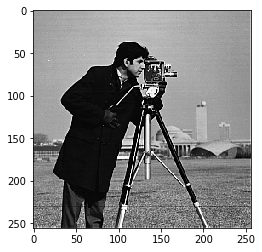

In [28]:
 imageSharpening()